# **Calculating portfolio returns and Cumulative portfolio returns in Python**

### **Calculating portfolio returns using the formula**

A portfolio return is the weighted average of individual assets in the portfolio.

Here is what we need :

- Asset symbols that make up our portfolio
- Price data for the assets
- Weights of assets
- Calculating the weighted average of our assets returns
- Adding them to get the portfolio returns


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


We will invest in the following assets

- Aggregate Bonds ETF (BND) 10%
- Small Cap ETF (VB) 20%
- Developed markets ETF (VEA) 25%
- S&P 500 ETF (VOO) 25%
- Emerging Markets ETF (VWO) 20%

So lets assign our assets to the symbols variable.

In [2]:
symbols = ['VOO','VEA', 'VB', 'VWO','BND']

Next we download the price data for the assets.

In [3]:
price_data = data.get_data_yahoo(symbols,start = '2013-01-01',end = '2018-03-01')
print(price_data.head())

Attributes   Adj Close                                              \
Symbols            VOO        VEA         VB        VWO        BND   
Date                                                                 
2013-01-02  115.581253  28.805780  74.857475  37.326729  68.750298   
2013-01-03  115.477432  28.516197  74.812477  37.105087  68.545433   
2013-01-04  115.961922  28.677080  75.379364  37.170753  68.651955   
2013-01-07  115.650497  28.532288  75.154419  36.850594  68.602821   
2013-01-08  115.304459  28.379452  75.010437  36.546867  68.668343   

Attributes       Close                                              ...  \
Symbols            VOO        VEA         VB        VWO        BND  ...   
Date                                                                ...   
2013-01-02  133.600006  35.810001  83.190002  45.470001  83.900002  ...   
2013-01-03  133.479996  35.450001  83.139999  45.200001  83.650002  ...   
2013-01-04  134.039993  35.650002  83.769997  45.279999  83.7799

But we just need the Adjusted Closing price for our returns calculations. So lets select that columns.

In [4]:
price_data = price_data['Adj Close']
print(price_data.head())

Symbols            VOO        VEA         VB        VWO        BND
Date                                                              
2013-01-02  115.581253  28.805780  74.857475  37.326729  68.750298
2013-01-03  115.477432  28.516197  74.812477  37.105087  68.545433
2013-01-04  115.961922  28.677080  75.379364  37.170753  68.651955
2013-01-07  115.650497  28.532288  75.154419  36.850594  68.602821
2013-01-08  115.304459  28.379452  75.010437  36.546867  68.668343


We can see that pandas has sorted our columns alphabetically so we need to align our weights correctly to the column names.

In [5]:
w = [0.1,0.2,0.25,0.25,0.2]

In [6]:
print(sum(w))

1.0


**Calculate the asset returns in the portfolio**

In [7]:
asset_returns = price_data.pct_change()[1:]
print(asset_returns.head())

Symbols          VOO       VEA        VB       VWO       BND
Date                                                        
2013-01-03 -0.000898 -0.010053 -0.000601 -0.005938 -0.002980
2013-01-04  0.004196  0.005642  0.007577  0.001770  0.001554
2013-01-07 -0.002686 -0.005049 -0.002984 -0.008613 -0.000716
2013-01-08 -0.002992 -0.005357 -0.001916 -0.008242  0.000955
2013-01-09  0.003001  0.004818  0.004319  0.005840 -0.000358


**Calculate the weighted returns of our assets**

In [8]:
weighted_returns = (w * asset_returns)
print(weighted_returns.head())

Symbols          VOO       VEA        VB       VWO       BND
Date                                                        
2013-01-03 -0.000090 -0.002011 -0.000150 -0.001484 -0.000596
2013-01-04  0.000420  0.001128  0.001894  0.000442  0.000311
2013-01-07 -0.000269 -0.001010 -0.000746 -0.002153 -0.000143
2013-01-08 -0.000299 -0.001071 -0.000479 -0.002061  0.000191
2013-01-09  0.000300  0.000964  0.001080  0.001460 -0.000072


**Calculate the Portfolio Returns**

Next the portfolio returns are simply the sum of the weighted returns of the assets. So lets add the rows.

In [9]:
port_ret = weighted_returns.sum(axis=1)

Lets plot the histogram of the returns.

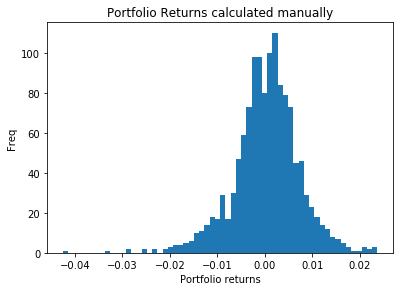

In [10]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(port_ret, bins = 60)
ax1.set_xlabel('Portfolio returns')
ax1.set_ylabel("Freq")
ax1.set_title("Portfolio Returns calculated manually")
plt.show();

**Portfolio mean and standard deviation**

In [11]:
mean_ret = port_ret.mean()
std_returns = port_ret.std()
print(mean_ret)

0.0003151118923507744


In [12]:
print(std_returns)

0.0070149751814181415


**Calculate the Cumulative Portfolio Returns**

To calculate cumulative returns we need to use the cumprod() function.

In [13]:
cumulative_ret = (port_ret + 1).cumprod()

Lastly we will plot our portfolios cumulative returns.

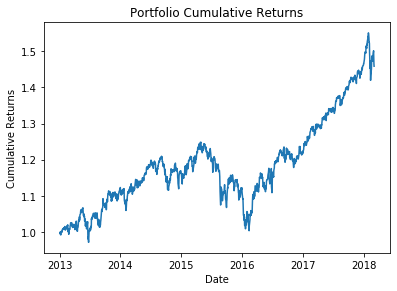

In [14]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(cumulative_ret)
ax1.set_xlabel('Date')
ax1.set_ylabel("Cumulative Returns")
ax1.set_title("Portfolio Cumulative Returns")
plt.show();